<a href="https://colab.research.google.com/github/twinkleSojeong/daitgirls_class/blob/main/210923_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로 설치하기
설치 및 임포트

In [ ]:
pip install tensorflow

In [3]:
import tensorflow as tf

# 감성분석
문장의 감성(sentiment)을 예측: 감성은 긍정과 부정, 찬성과 반대, 좋다와 싫다 등

기쁨, 슬픔, 분노 등은 정서(emotion)이라고 함

Yelp데이터: 맛집리뷰데이터

In [5]:
import pandas as pd
df = pd.read_excel('yelp.xlsx')
df

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
# 전처리: 문서 단어 행렬
# 임포트
from sklearn.feature_extraction.text import CountVectorizer

# 빈도순으로 최대 1000개 단어를 사용하도록 설정, 영어 불용어는 제외
# 전치사나 관사는 분석에서 제외해주기 위해서 작성
cv = CountVectorizer(max_features=1000, stop_words='english')

# 문서 단어 행렬로 변환
dtm = cv.fit_transform(df.review)

In [7]:
# 지난시간내용
word_count = pd.DataFrame({
    'word': cv.get_feature_names(),
    'count': dtm.sum(axis=0).flat
})
word_count.sort_values('count', ascending=False).head(10)

,word,count
246,food,126
498,place,106
265,good,95
668,service,85
268,great,70
347,like,46
834,time,42
583,really,36
328,just,35
56,best,30


In [8]:
# 데이터 분할
# x와 y를 지정
x = dtm
y = df.sentiment

# 훈련용(80%)과 테스트용(20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [9]:
# Sequential: 순서대로 층을 쌓아서 모형을 만드는 함수
# Dense: 선형모형과 동일하게 모든 입력에 가중치를 곱하여 더하는 층
# 1: 출력의 개수, 글 하나에 긍/부정 하나를 예측하므로 출력의 개수는 1개
# activation: 출력의 형태를 결정하는 활성화 함수
# sigmoid: S자 형태의 활성화 함수로 로지스틱 함수와 동일

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

# 경사하강법 gradient descent
- 신경망의 파라미터를 추정하는 방법
- 일부 데이터(배치)를 입력
- 손실과 그 경사(기울기)를 계산
- 손실이 감소하는 방향으로 파라미터 수정
- 더 이상 손실이 줄어들지 않을때까지 반복

In [17]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [ ]:
# 배치: 한 번에 모형의 파라미터 조정에 사용하는 데이터(기본 32개)
# 에포크: 전체 데이터를 한 번 처음부터 끝까지 훑는 과정(800=32*25)
# 에포크를 거듭할수록 손실은 감소, 정확도는 향상

model.fit(x_train.A, y_train, epochs=10)

In [ ]:
model.evaluate(x_test.A, y_test)

In [ ]:
# 모델 예측

y_test
model.predict(x_test.A)

Fashion MNIST

In [57]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [58]:
# 전처리: 나눠준 이유는 너무 커지면 결과가 잘 나오지 않기 때문

x_train = x_train / 255.0
x_test = x_test / 255.0

In [59]:
x_test.max()

1.0

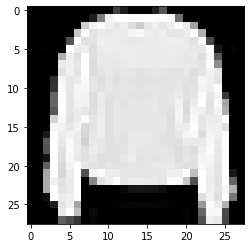

In [32]:
# 이미지 보기

import matplotlib.pyplot as plt
plt.imshow(x_train[7], cmap='gray')

In [33]:
# 입력이 가로*세로 2차원 형태이므로 flatten 이용해 1차원 형태로 바꿔줌
# 이미지 종류가 10개이므로 각 종류의 확률을 예측

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation='softmax')
])

# 소프트맥스 함수
- 입력받은 모든 값을 각각 0~1 범위로 변환하여 출력, 출력값의 합=1
- 둘 중에 하나로 예측할 때: sigmoid
- 셋 이상 중에 하나로 예측할 때: softmax

In [35]:
# 훈련방법 설정
# sparse_categorical_crossentropy: 교차 엔트로피(범주가 여러개)
# adam: 경사하강법 알고리즘의 일종

model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
# validation_split=0.1: 10%의 데이터를 훈련에 사용하지 않고 남겨두었다가, 각 에포크의 끝에 성능테스트
# EarlyStopping: 인공신경망의 학습에서 에포크 수를 결정하는 방법

model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[
                                                                         tf.keras.callbacks.EarlyStopping()
])

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [61]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[
                                                                         tf.keras.callbacks.EarlyStopping()
])

In [ ]:
model.evaluate(x_test, y_test)

In [64]:
x_train.max()

1.0

# 앞먹임
- CNN: 이미지
- RNN: 텍스트 문맥을 살펴볼 때
- transformer: 문맥을 포함해서 처리하는 것

In [66]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,3),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(32,3),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(32, activation='softmax')
])

In [67]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [68]:
import numpy as np
x_train2 = np.expand_dims(x_train, -1)

In [ ]:
model.fit(x_train2, y_train, epochs=100, validation_split=0.1, callbacks=[
                                                                          tf.keras.callbacks.EarlyStopping(patience=3)
])

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [ ]:
!unzip cats_and_dogs_filtered.zip

In [76]:
import os.path
data_dir = 'cats_and_dogs_filtered'
BATCH_SIZE = 32 #사진을 32장만 가지고 와라(마음대로 설정해도 가능)
IMG_SIZE = (224,224) # 홈페이지에 있는 크기에 맞춰줌

In [78]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'train'),
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
)

Found 2000 files belonging to 2 classes.


In [102]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'validation'),
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
)

Found 1000 files belonging to 2 classes.


In [80]:
images, labels = next(iter(train_dataset))

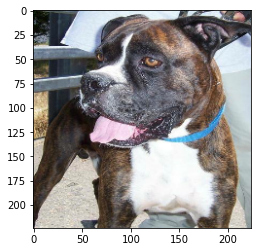

In [86]:
# unit8: unsigned integer 8bit(부호가 없는 8비트 정수)
plt.imshow(images[0].numpy().astype('uint8'))

In [ ]:
images[0].shape

In [ ]:
images.shape

# 텐서플로우 허브 이용해보기

In [ ]:
pip install tensorflow_hub

In [88]:
import tensorflow_hub as hub

In [89]:
# 모델제작(MobileNetV2 모델)
# 1001 종류의 사물을 구별하도록 학습된 모델

model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
model = tf.keras.Sequential([
	tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
	hub.KerasLayer(model_url)
])

레이블 설정하고 예측하기

In [ ]:
label_file = tf.keras.utils.get_file(origin=
                                     'https://storage.googleapis.com/download.tensorflow.org/data/' + 'ImageNetLabels.txt')

labels = open(label_file).read().splitlines()

In [96]:
predicted = model.predict(images)

In [ ]:
predicted.argmax(axis=1)

In [ ]:
for i in predicted.argmax(axis=1):
  print(labels[i])

출력층 덧붙이고 미세조정하기

In [98]:
model_url = ('https://tfhub.dev/google/imagenet/'
             'mobilenet_v2_100_224/feature_vector/5')

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    hub.KerasLayer(model_url, trainable=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [103]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy'])

model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping()]
)

Epoch 1/100
32/32 [==============================] - 54s 2s/step - loss: 0.3493 - accuracy: 0.8770 - val_loss: 0.1296 - val_accuracy: 0.9790
